# 隐藏或删除内容

控制哪些内容出现在你的书中是可能的。例如，您可能希望显示一个复杂的可视化来说明某个思想，但不希望页面与生成可视化的大型代码单元格混乱在一起。在其他情况下，您可能希望完全删除代码单元格。

在这种情况下，您有两个选择：

- **隐藏**内容提供了一个按钮，让读者显示内容。
- **删除**内容会阻止它进入你的书中。它将完全消失（尽管仍然存在于源文件中）

隐藏内容有两种方式：

- 要隐藏 Markdown，使用 `{toggle}` 指令。
- 要隐藏或删除代码单元格或它们的输出，请使用**笔记本单元格标签**。

我们将在下面介绍每种选择。

:::{seealso}
[](jupyter-cell-tags)
:::

## 使用 MyST Markdown 隐藏 Markdown

有两种方法来隐藏 Markdown 内容：

* 你可以使用 `{toggle}` 指令隐藏任意的内容块
* 您可以使用带有  admonitions 的 `dropdown` 类将它们转换为下拉框

两者都允许你在一个按钮中包装大量的Markdown，让用户显示和隐藏内容。

### `{toggle}` 指令

你可以在 Markdown 中使用 `{toggle}` 指令激活一个可切换的行为，如下所示：

````md
```{toggle}
Some hidden toggle content!

![](../images/cool.jpg)
```
````

结果是：

```{toggle}
Some hidden toggle content!

![](../images/cool.jpg)
```

注意，如果你想默认显示 toggle 内容，你可以在使用 `{toggle}` 时添加 `:show:` 标志，如下所示:

````md
```{toggle} Click the button to reveal!
:show:
Some hidden toggle content!

![](../images/cool.jpg)
```
````

### 用下拉框切换警告内容

你也可以添加**切换按钮警告块**，有效地使他们下拉块。用户会看到警告标题，但需要点击才能显示内容。为此，在任何警告中添加 `dropdown` 类。例如，代码

````md
```{admonition} Click the button to reveal!
:class: dropdown
Some hidden toggle content!

![](../images/cool.jpg)
```
````

结果：

```{admonition} Click the button to reveal!
:class: dropdown
Some hidden toggle content!

![](../images/cool.jpg)
```

有关警告下拉框的更多信息，请参阅 {ref}`content/toggle-admonitions`。

## 隐藏代码单元格内容

可以隐藏页面中的大多数单元格元素。下面的章节描述了如何在 MyST Markdown 中隐藏每个使用单元格标签。如果您正在使用 `.ipynb` 文件，请参阅在 Jupyter Notebook 或 JupyterLab 中添加单元格标签到笔记本的[单元格标签指南](jupyter-cell-tags)。

如果一个元素被隐藏了，Jupyter Book 会在隐藏元素的旧位置右侧显示一个小按钮。如果用户单击该按钮，则会显示该元素。

### 隐藏单元格输入

如果您将标签 `hide-input` 添加到一个单元格中，那么 Jupyter Book 将隐藏该单元格，但显示输出。

下面是一个会触发“隐藏代码”行为的单元格元数据示例：

```json
{
    "tags": [
        "hide-input",
    ]
}
```

例如，请注意下面的单元格包含了 `hide-input` 标签：

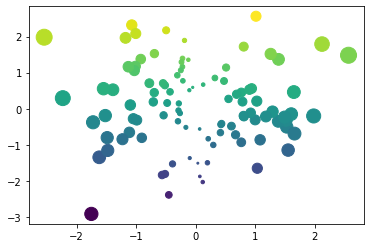

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

请注意，我们只在默认情况下看到输出。现在试着点击上面的空白点右边的按钮！

### 隐藏单元格输出

您还可以隐藏单元格的输出。例如，如果您想让用户在查看答案之前先考虑*输出*是什么样子的。为此，将以下标记添加到单元格中：

```json
{
    "tags": [
        "hide-output",
    ]
}
```

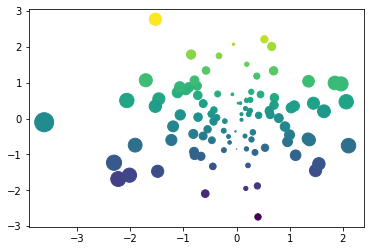

In [2]:
# This cell should have its output hidden!
data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

### 隐藏整个代码单元格

如果你想隐藏整个代码单元格(输入和输出)，只需将这个标签添加到单元格元数据，像这样：

```json
{
    "tags": [
        "hide-cell",
    ]
}
```

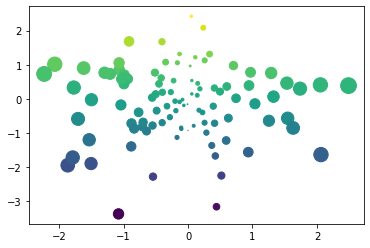

In [3]:
# This cell should have its output hidden!
data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

(hiding/remove-content)=
## 删除代码单元格内容

在上面的例子中，我们只*隐藏*了单元格的一部分，如果读者愿意，可以选择显示它们。但是，如果您想完全删除各自的部分，使其内容不进入书的 HTML，您可以使用适当的 `remove-` 标签，即 `remove-input`、`remove-output` 和 `remove-cell`.

### 删除单元格输入

使用 `remove-input` 删除下列单元格的输入。注意，在这种情况下，没有按钮可用来显示输入内容，整个输入单元格消失了！

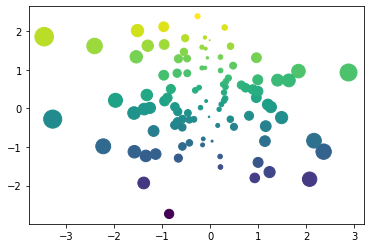

In [4]:
# For example, this cell's inputs will be removed
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

### 删除单元格输出

类似于删除输入，也可以使用 `remove-output` 删除单元格的输出：

```json
{
    "tags": [
        "remove-output",
    ]
}
```

### 删除整个代码单元格

您还可以删除单元格的输入和输出，在这种情况下，它将根本不会出现在您的书中。这些单元格保留在笔记本文件中，因此如果读者单击页面上的 {term}`JupyterHub` 或 {term}`Binder` 链接，它们就会显示出来。

要同时删除单元格的输入和输出，请将标记 `remove-cell` 添加到该单元格的标记中。下面是一个单元格元数据的例子，它会触发“移除单元格”行为:

```json
{
    "tags": [
        "remove-cell",
    ]
}
```

这些单元格将从每一页中完全删除：记住，如果您想选择性地显示单元格的输入，您应该使用 `hide-input` 标签。

例如，该文本下面有一个单元格，它不会出现在最后一本书中，因为它已经被删除了！

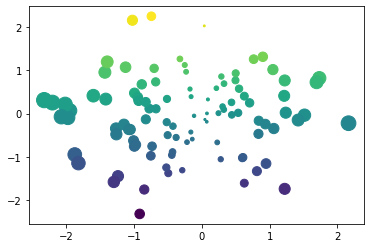

In [5]:
# For example, this entire cell (input and output) will be removed
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

### 删除空单元格

您不需要做任何事情来从页面中删除空单元格。Jupyter Book 将自动删除这些。任何只有空格的单元格将被删除。

例如，在本页的笔记本上有两个单元格。两者都只包含空格。它们都从最终输出中消失。